# Reprezentacja grafowa obrazu #
Plan:

1. Wczytywanie obrazu.

2. Transformacja do grafu.

3. Wizualizacja za pomocą programu *graphviz*.

## Import bibliotek##

In [8]:
from PIL import Image
import numpy as np
import networkx as nx
from graphviz import Graph
from networkx.algorithms import approximation as apxa
from random import randint
import matplotlib.pyplot as plt

## 1. Wczytywanie obrazu ##

In [52]:
image = Image.open("./deer.jpg")

Teraz należy przekształcić obraz do postaci macierzy $64 \times 64 \times 3$. Jej elementami będą wartości poszczególnych pikseli. Zauważmy, że jest to macierz 3-wymiarowa - ostatni wymiar odpowiada warstwom *RGB*. Proponuję zatem rozważyć trzy macierze reprezentujące odpowiednie warstwy.

In [53]:
image = image.resize((128,128))
image_arr = np.array(image, dtype='int16')
image_arr.shape

(128, 128, 3)

In [4]:
channel_r = image_arr[:,:,0] 
channel_g = image_arr[:,:,1]
channel_b = image_arr[:,:,2]

In [5]:
channel_r.shape

(128, 128)

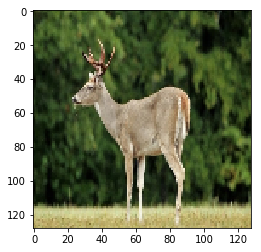

In [6]:
plt.imshow(image)

TODO - wyświetlić jak wyglądają obrazy tych warstwy...

## 2. Transformacja do grafu ##

Następnie przystępujemy do budowy grafów $G_r, G_g, G_b$ reprezentujących warstwy obrazu.

**Opis konstrukcji**: wierzchołki to piksele, krawędź łącząca sąsiednie piksele $p_1, p_2$ ma wagę $d(p_1, p_2) = abs(w(p_1) - w(p_2))$, istnieje jeśli $d \leq p$, gdzie $p$ to wyznaczona przez autora *granica*.

In [7]:
# User może zdefiniować jaka jest granica
p = 15

In [48]:
def init_graphs():
    graph_r = nx.Graph()
    graph_g = nx.Graph()
    graph_b = nx.Graph()
    
    return graph_r, graph_g, graph_b

In [55]:
# graph_r, graph_g, graph_b = init_graphs()

Definiowanie zbiorów wierzchołków grafów $G_r, G_g, G_b$

In [4]:
def define_nodes(graph, shape):
    for i in range(shape[0]):
        for j in range(shape[1]):
            graph.add_node((i, j)) # wierzchołki to pary (i,j)

In [56]:
# define_nodes(graph_r, image_arr.shape)
# define_nodes(graph_g, image_arr.shape)
# define_nodes(graph_b, image_arr.shape)

Definiowanie zbiorów krawędzi grafów $G_r, G_g, G_b$ przy uwzględnieniu granicy $p$.

In [5]:
def define_edges(graph, channel, shape, p):
    for i in range(shape[0]):
        for j in range(shape[1]):
            # badamy wcześniejszych sąsiadów piksela (i,j)
            if i - 1 >= 0 and abs(channel[i][j] - channel[i-1][j]) <= p:
                graph.add_edge((i, j), (i-1, j), weight=abs(channel[i][j] - channel[i-1][j]))

            if j - 1 >= 0 and abs(channel[i][j] - channel[i][j-1]) <= p:
                graph.add_edge((i, j), (i, j-1), weight=abs(channel[i][j] - channel[i][j-1]))

    #         if i - 1 >= 0 and j - 1 >= 0 and abs(channel[i][j] - channel[i-1][j-1]) <= p:
    #             graph.add_edge((i, j), (i-1, j-1), weight=abs(channel[i][j] - channel[i-1][j-1]))

    #         if i - 1 >= 0 and j + 1 < image_arr.shape[1] and abs(channel[i][j] - channel[i-1][j+1]) <= p:
    #             graph.add_edge((i, j), (i-1, j+1), weight=abs(channel[i][j] - channel[i-1][j+1]))

In [25]:
# define_edges(graph_r, channel_r)
# define_edges(graph_g, channel_g)
# define_edges(graph_b, channel_b)

## 3. Wizualizacja grafu za pomocą narzędzia *graphviz* ##

In [ ]:
# graph1 = Graph(format='png')

# for g in graph_r:
#     name = str(g[0]) + "-" + str(g[1])
#     graph1.node(name)
    
# for e in graph_r.edges:
#     tail_name = str(e[0][0]) + "-" + str(e[0][1])
#     head_name = str(e[1][0]) + "-" + str(e[1][1])
#     graph1.edge(tail_name=tail_name, head_name=head_name)
    
# graph1.render(filename='graph1')
    
# na przyszłość...
# print(graph_b.get_edge_data((1,1),(1,0)))

Poniższy kod pozwala na wygenerowanie grafu o wierzchołkach ułożonych zgodnie z układem pikseli w wyjściowym obrazku.

In [ ]:
# graph2 = Graph(engine="neato", filename='graph2.gv',format='png')

# graph2.attr(size='64')
# for g in graph_g:
#     name = str(g[0]) + "-" + str(g[1])
#     pos = str(g[0]) + ',' + str(g[1]) + '!'
#     graph2.node(name, pos=pos)
    
# for e in graph_g.edges:
#     tail_name = str(e[0][0]) + "-" + str(e[0][1])
#     head_name = str(e[1][0]) + "-" + str(e[1][1])
#     graph2.edge(tail_name=tail_name, head_name=head_name)
    
# graph2.render(filename='graph2')

## 4. Wyznaczenie składowych k-spójnych

In [26]:
# funkcja k_components() zwraca listę zbiorów zawierających spójne składowe kolejnych stopni,
# tzn. k_components[2] zawiera zbiór składowych 2-spójnych
k_components_r = apxa.k_components(graph_r)
k_components_g = apxa.k_components(graph_g)
k_components_b = apxa.k_components(graph_b)

In [27]:
# ten graf nie jest 3-spójny...
# k_components_r[3]

In [28]:
two_connected_components_r = k_components_r[2]
two_connected_components_g = k_components_g[2]
two_connected_components_b = k_components_b[2]

In [29]:
print(len(two_connected_components_r))
print(len(two_connected_components_g))
print(len(two_connected_components_b))

57
67
52


In [57]:
# colors = ['palegreen3', 'paleturquoise3', 'palevioletred3','azure', 'pink1', 
#           'plum1', 'purple', 'purple4', 'salmon', 'coral',
#           'seagreen', 'violet', 'deeppink', 'crimson', 'grey', 
#           'darkred', 'tomato', 'teal', 'indigo', 'magenta']

In [31]:
# two_connected_subgraph = Graph(engine="neato", filename='two_conn.gv',format='png')

# two_connected_subgraph.attr(size='64')
# i = 0

# # rysuję graf złożony z podgrafów 2-spójnych
# for component in two_connected_components_g:
#     for pair in component:
#         name = str(pair[0]) + "-" + str(pair[1])
#         pos = str(pair[1]) + ',' + str(image.size[0]-pair[0]) + '!' # żeby uzyskać poprawne rozmieszczenie na obrazie
#         color = colors[i]
#         two_connected_subgraph.node(name, pos=pos, color=color, style='filled', fillcolor=color)
#     i = randint(0,len(colors)-1)

In [32]:
# name = 'hen_' + str(image.size[0]) + '_p' + str(p)
# two_connected_subgraph.render(filename=name)

## Inna metoda wizualizacji efektu segmentacji ##

Biorę kolejne komponenty, wyliczam średnią wartość piksela dla danego komponentu i nanoszę na kolejne channele RGB.

In [13]:
def get_result_channel(channel, two_connected_components):

    result = np.full(channel.shape, 255)

    for component in two_connected_components:
        num_of_pixels = len(component)
        value_acc = 0.0
        for pair in component:
            value_acc += channel[pair[0]][pair[1]]

        avg_value = value_acc / num_of_pixels # średnia wartość piksela, będzie to kolor reprezentujący dany segment

        avg_value = int(avg_value)
        for pair in component:
            result[pair[0]][pair[1]] = avg_value
            
    return result

In [58]:
# r_result = get_result_channel(channel_r, two_connected_components_r)
# g_result = get_result_channel(channel_g, two_connected_components_g)
# b_result = get_result_channel(channel_b, two_connected_components_b)

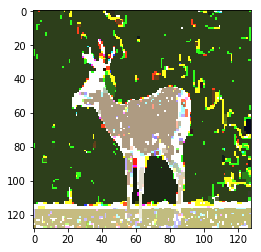

In [35]:
im = np.zeros((image_arr.shape[0],image_arr.shape[0],3))
im[:,:,0] = r_result
im[:,:,1] = g_result
im[:,:,2] = b_result
im = np.array(im, dtype='int16')

# im = Image.fromarray(b_result)

plt.imshow(im)

## Powyższe funkcje są składowymi następującego pipeline'a ##
Poniższa funkcja przyjmuje jako argumenty ścieżkę do obrazu, wartość graniczną $p$ oraz wymiary wyjściowego obrazu.

In [17]:
def two_connected_pipeline(image_path, p, shape):
    image = Image.open(image_path)
    
    image = image.resize(shape)
    image_arr = np.array(image, dtype='int16')
    
    channel_r = image_arr[:,:,0] 
    channel_g = image_arr[:,:,1]
    channel_b = image_arr[:,:,2]
    
    graph_r, graph_g, graph_b = init_graphs()
    
    define_nodes(graph_r, shape)
    define_nodes(graph_g, shape)
    define_nodes(graph_b, shape)
    
    define_edges(graph_r, channel_r, shape, p)
    define_edges(graph_g, channel_g, shape, p)
    define_edges(graph_b, channel_b, shape, p)
    
    k_components_r = apxa.k_components(graph_r)
    k_components_g = apxa.k_components(graph_g)
    k_components_b = apxa.k_components(graph_b)
    
    two_connected_components_r = k_components_r[2]
    two_connected_components_g = k_components_g[2]
    two_connected_components_b = k_components_b[2]
    
    r_result = get_result_channel(channel_r, two_connected_components_r)
    g_result = get_result_channel(channel_g, two_connected_components_g)
    b_result = get_result_channel(channel_b, two_connected_components_b)
    
    result = np.zeros((shape[0], shape[1], 3))
    result[:,:,0] = r_result
    result[:,:,1] = g_result
    result[:,:,2] = b_result
    result = np.array(result, dtype='int16')
    
    figure = plt.figure()
    figure.add_subplot(1,2,1)
    plt.imshow(image)
    figure.add_subplot(1,2,2)
    plt.imshow(result)
    plt.show(block=True)

In [59]:
image_path = './lion.jpg'
p = 9
shape = (256,256)

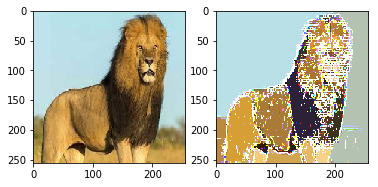

In [60]:
two_connected_pipeline(image_path, p, shape)

## Wpływ parametru p na wynik segmentacji ##

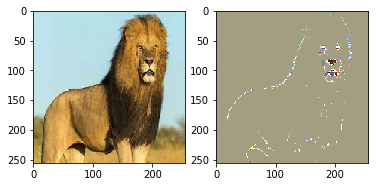

In [62]:
two_connected_pipeline(image_path, 30, shape)

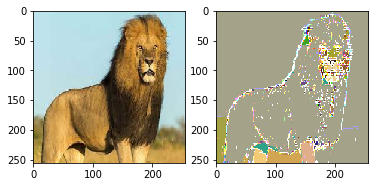

In [64]:
two_connected_pipeline(image_path, 15, shape)

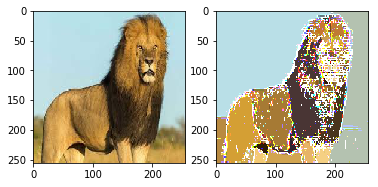

In [65]:
two_connected_pipeline(image_path, 10, shape)

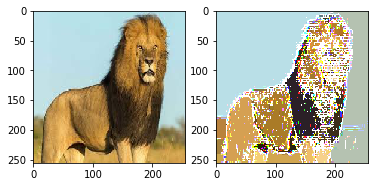

In [67]:
two_connected_pipeline(image_path, 8, shape)

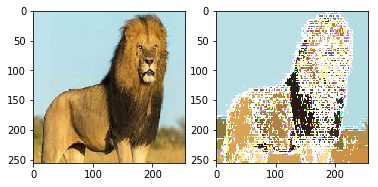

In [68]:
two_connected_pipeline(image_path, 5, shape)

### Wnioski ###
- gdy $p \geq 30$, to mamy mało składowych 2-spójnych, rezultatem jest kilka jednolitych obszarów,

- gdy $p = 10$, to segmentacja wydaje się być całkiem dobra,

- gdy $p < 10$, to obraz staje się nieczytelny.

## Rezultaty ##

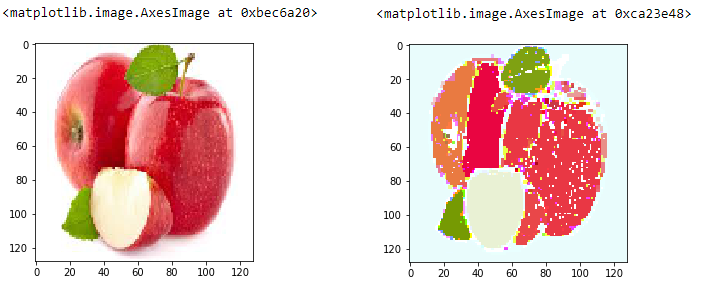

In [36]:
Image.open("./comp1.png")

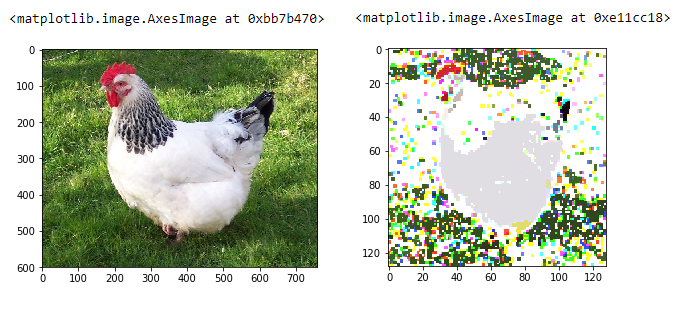

In [37]:
Image.open("./comp2.png")

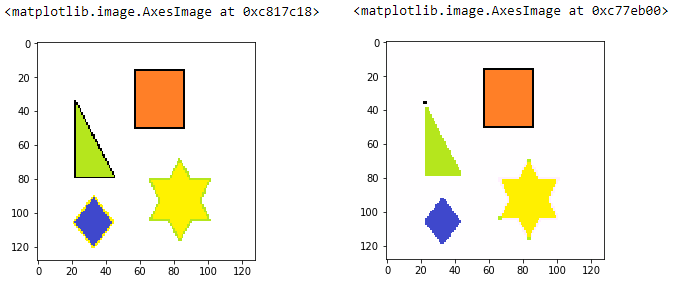

In [38]:
Image.open("./comp3.png")

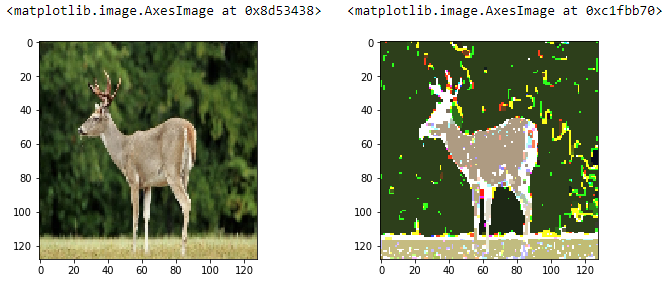

In [39]:
Image.open("./comp4.png")

## Wnioski ##
- parametry wpływające na ostateczny efekt segmentacji: wartość progowa $p$, rozdzielczość obrazka, liczba krawędzi w badanych grafie (grafy o max stopniu mniejszym lub równym 4 są analizowane całkiem szybko, jednak gdy max stopień wynosi 8, to czas obliczeń znacząco wzrasta)

- im mniejszy threshold $p$, tym więcej powstaje składowych 2-spójnych

In [ ]:
# mozna jeszcze zrobic cieniowanie wyjsciowego zdjęcia segmentami